# Analyse Italy

In [1]:
%run ./Load-Data.ipynb

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


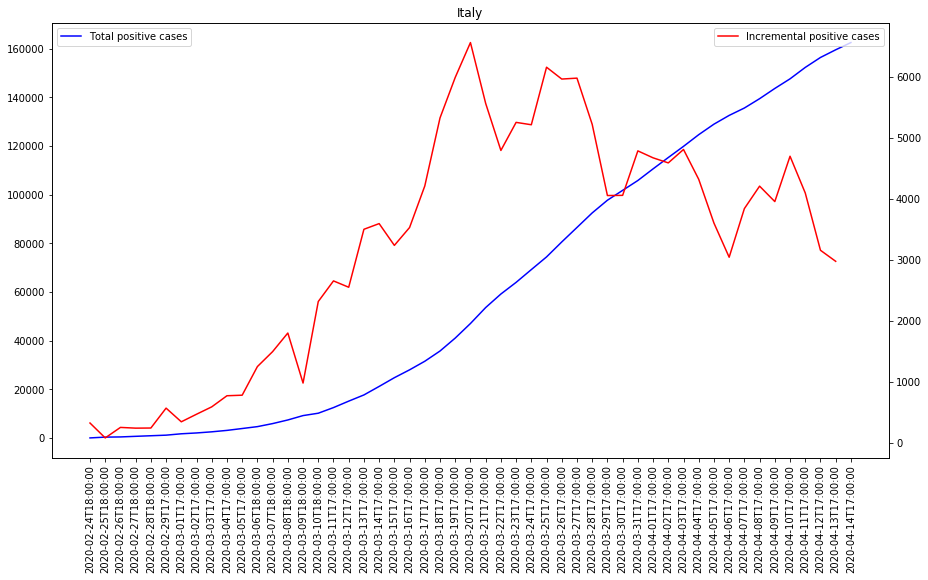

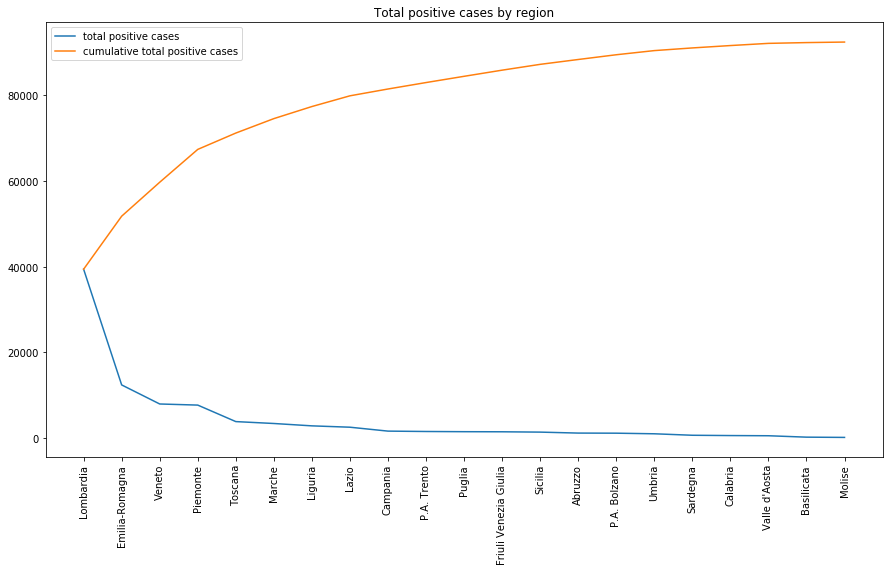

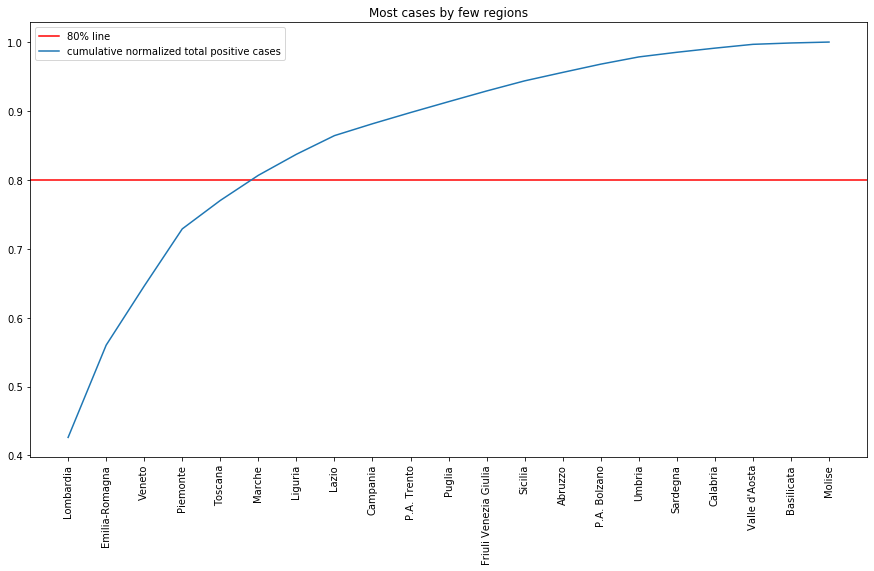

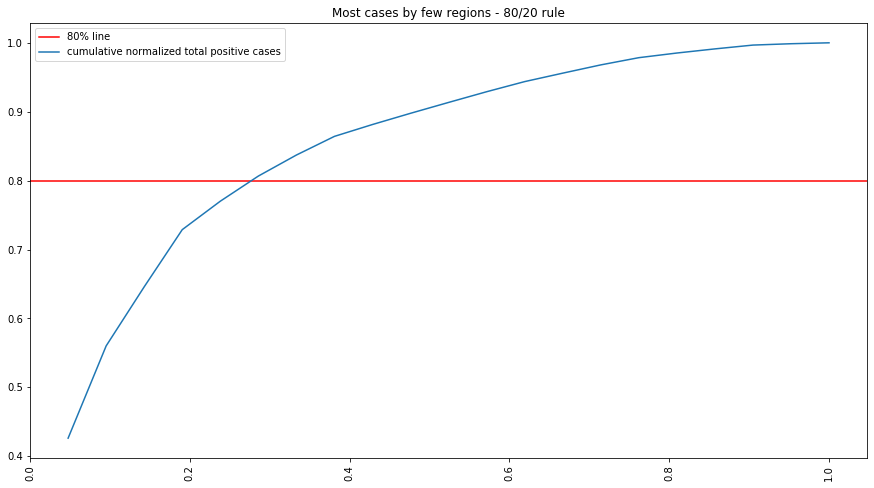

In [9]:
from matplotlib import pyplot
import numpy as np
from scipy import stats
%matplotlib inline

provinceDf_group_by_date = provinceDf.groupby('Date').sum()
regionDf_group_by_date = regionDf.groupby('Date').sum()

total_positive_cases_timeseries = provinceDf_group_by_date['TotalPositiveCases']
total_removed_cases_timeseries = regionDf_group_by_date['Recovered']+regionDf_group_by_date['Deaths']

incremental_positive_cases_timeseries = np.diff(total_positive_cases_timeseries.values.flatten())
pyplot.figure(figsize=(15, 8))
pyplot.xticks(rotation=90)
pyplot.title("Italy")
ax = pyplot.axes()
ax_bis = ax.twinx()
ax.plot(total_positive_cases_timeseries, label='Total positive cases', color='blue')
ax_bis.plot(incremental_positive_cases_timeseries, label='Incremental positive cases', color= 'red')
ax.legend(loc=2)
ax_bis.legend(loc=1)   
pyplot.show()


date_ = '2020-03-28T17:00:00'
df_last_date = provinceDf[provinceDf['Date']==date_]
df_last_date = df_last_date.groupby('RegionName').sum()

# df_last_date = df_last_date.sortby('TotalPositiveCases')
df_timeseries = df_last_date['TotalPositiveCases']
df_timeseries = df_timeseries.sort_values(ascending=False)
pyplot.figure(figsize=(15, 8))
pyplot.title("Total positive cases by region")
pyplot.xticks(rotation=90)
pyplot.plot(df_timeseries, label="total positive cases")
cumm_df_timeseries = np.cumsum(df_timeseries)
pyplot.plot(cumm_df_timeseries, label ="cumulative total positive cases")
pyplot.legend()
pyplot.show()


df_timeseries = df_timeseries/df_timeseries.sum()

out_sum = np.cumsum(df_timeseries)
pyplot.figure(figsize=(15, 8))
pyplot.xticks(rotation=90)
pyplot.title("Most cases by few regions")
pyplot.axhline(y=0.8,  color='red', label="80% line")
pyplot.plot(out_sum, label="cumulative normalized total positive cases")
pyplot.legend()
pyplot.show()


len_reg=len(df_last_date)
x= np.arange(len_reg)
x=x+1
x = x/x.max()
pyplot.figure(figsize=(15, 8))
pyplot.title("Most cases by few regions - 80/20 rule")
pyplot.axhline(y=0.8,  color='red', label="80% line")
# TODO : compute value of x for which y=0.8 and show
pyplot.plot(x, out_sum, label="cumulative normalized total positive cases")
pyplot.xticks(rotation=90)
pyplot.legend()
pyplot.show()


In [ ]:
# TODO - map the cases by population